In [6]:
import pandas as pd
df=pd.read_csv('signal_metrics.csv')
df.head()


Timestamp           Locality   Latitude  Longitude  \
0  2023-05-05 12:50:40.000000           Anisabad  25.599109  85.137355   
1  2023-05-05 12:53:47.210173        Fraser Road  25.433286  85.070053   
2  2023-05-05 12:56:54.420346  Boring Canal Road  25.498809  85.211371   
3  2023-05-05 13:00:01.630519            Danapur  25.735138  85.208400   
4  2023-05-05 13:03:08.840692    Phulwari Sharif  25.538556  85.159860   

   Signal Strength (dBm)  Signal Quality (%)  Data Throughput (Mbps)  \
0             -84.274113                 0.0                1.863890   
1             -97.653121                 0.0                5.132296   
2             -87.046134                 0.0                1.176985   
3             -94.143159                 0.0               68.596932   
4             -94.564765                 0.0               38.292038   

   Latency (ms) Network Type  BB60C Measurement (dBm)  \
0    129.122914           3G                 0.000000   
1     54.883606           4G               -95.810791   
2    119.598286          LTE               -91.593861   
3     46.598387           5G               -90.642773   
4     30.342828           5G               -90.489100   

   srsRAN Measurement (dBm)  BladeRFxA9 Measurement (dBm)  
0                  0.000000                      0.000000  
1               -105.452359                    -99.920892  
2                -95.419482                    -87.714070  
3               -101.895905                    -96.570698  
4               -103.318304                    -95.102467

In [7]:
df.columns


Index(['Timestamp', 'Locality', 'Latitude', 'Longitude',
       'Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)',
       'Latency (ms)', 'Network Type', 'BB60C Measurement (dBm)',
       'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)'],
      dtype='object')

In [8]:
df.shape

(16829, 12)

In [9]:
df.dtypes

Timestamp                        object
Locality                         object
Latitude                        float64
Longitude                       float64
Signal Strength (dBm)           float64
Signal Quality (%)              float64
Data Throughput (Mbps)          float64
Latency (ms)                    float64
Network Type                     object
BB60C Measurement (dBm)         float64
srsRAN Measurement (dBm)        float64
BladeRFxA9 Measurement (dBm)    float64
dtype: object

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
#checking for missing values
df["Timestamp"].isna().sum()

np.int64(0)

In [12]:
print("Earliest timestamp:", df["Timestamp"].min())
print("Latest timestamp:", df["Timestamp"].max())

Earliest timestamp: 2023-05-05 12:50:40
Latest timestamp: 2023-06-10 23:56:52.791244


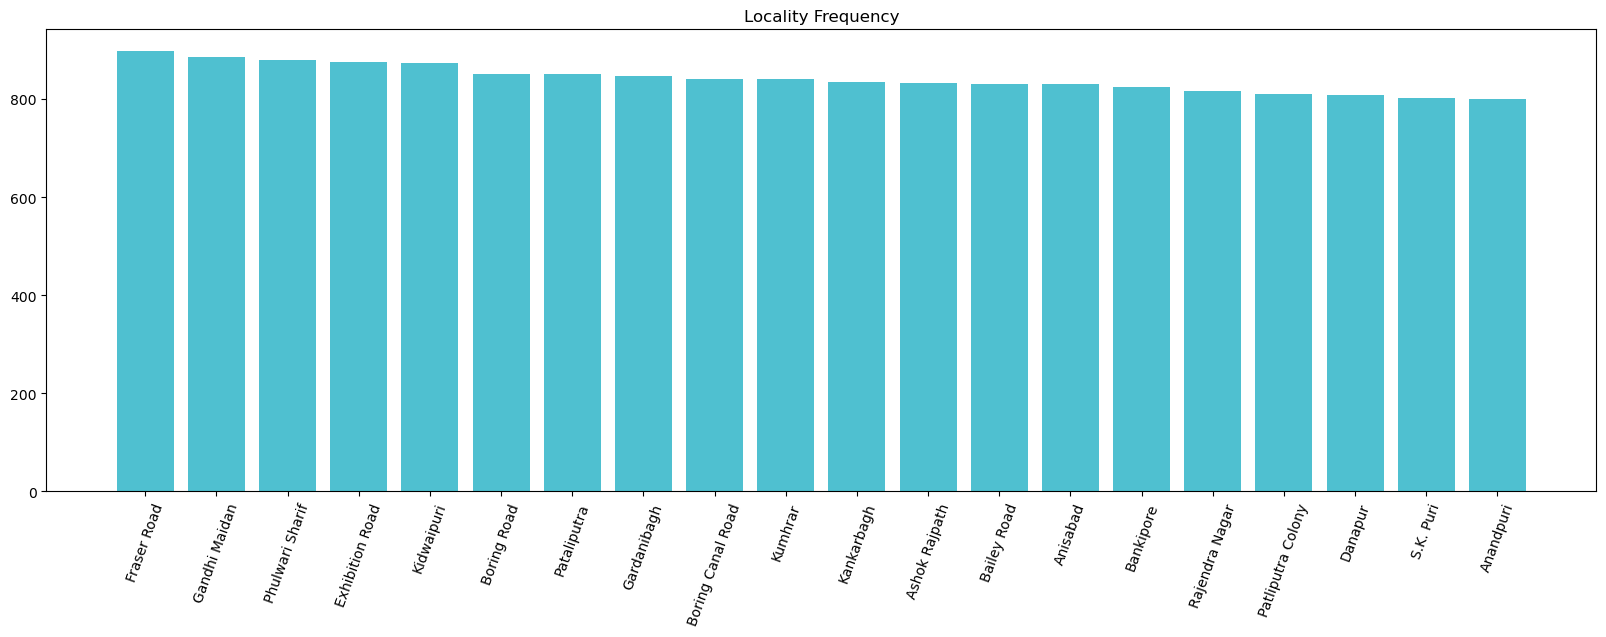

In [13]:
import matplotlib.pyplot as plt

region_counts = df["Locality"].value_counts()

plt.figure(figsize=(20, 6))
plt.bar(region_counts.index, region_counts.values, color="#4FC0D0")
plt.xticks(region_counts.index, rotation=70)
plt.title("Locality Frequency")

plt.show()

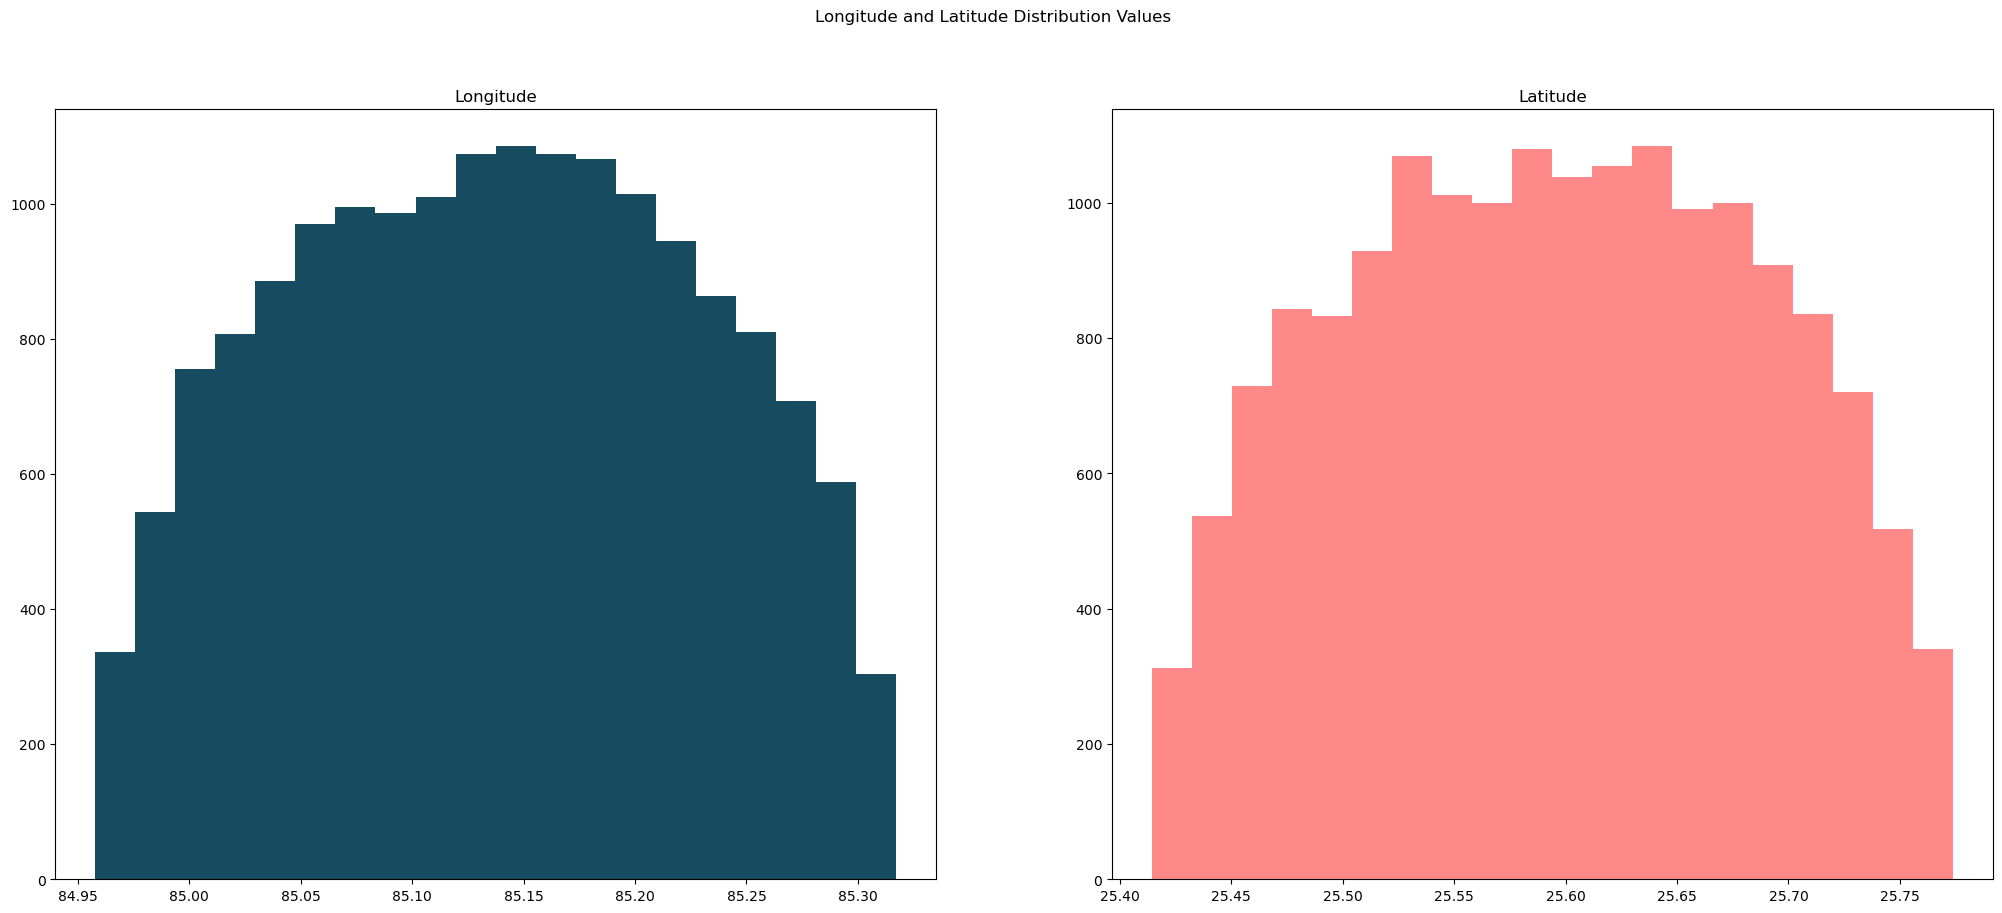

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

axes[0].hist(df["Longitude"], bins=20, color="#164B60")
axes[0].set_title("Longitude")

axes[1].hist(df["Latitude"], bins=20, color="#FF8989")
axes[1].set_title("Latitude")

plt.suptitle("Longitude and Latitude Distribution Values")
plt.show()

In [15]:
print('Min Longitude:', df["Longitude"].min())
print('Max Longitude:', df["Longitude"].max())
print('Min Latitude:', df["Latitude"].min())
print('Max Latitude:', df["Latitude"].max())

Min Longitude: 84.95793630176554
Max Longitude: 85.31699355512761
Min Latitude: 25.414574976723216
Max Latitude: 25.77364847780419


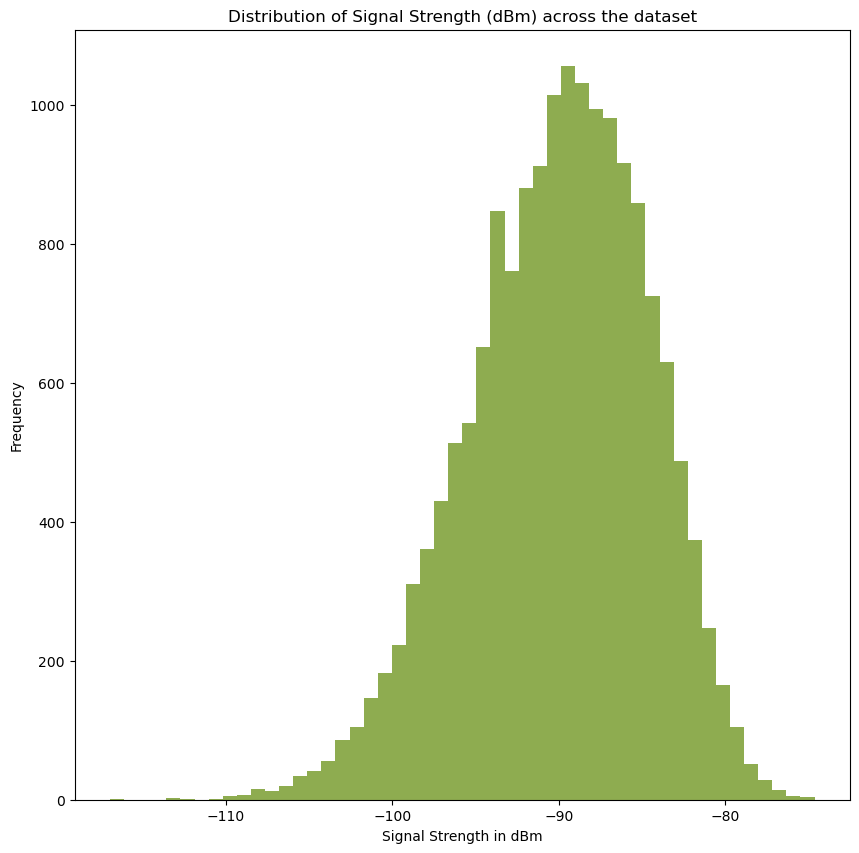

In [16]:
plt.figure(figsize=(10,10))
plt.hist(df["Signal Strength (dBm)"], bins=50, color="#8EAC50")
plt.xlabel("Signal Strength in dBm")
plt.ylabel("Frequency")
plt.title("Distribution of Signal Strength (dBm) across the dataset")
plt.show()

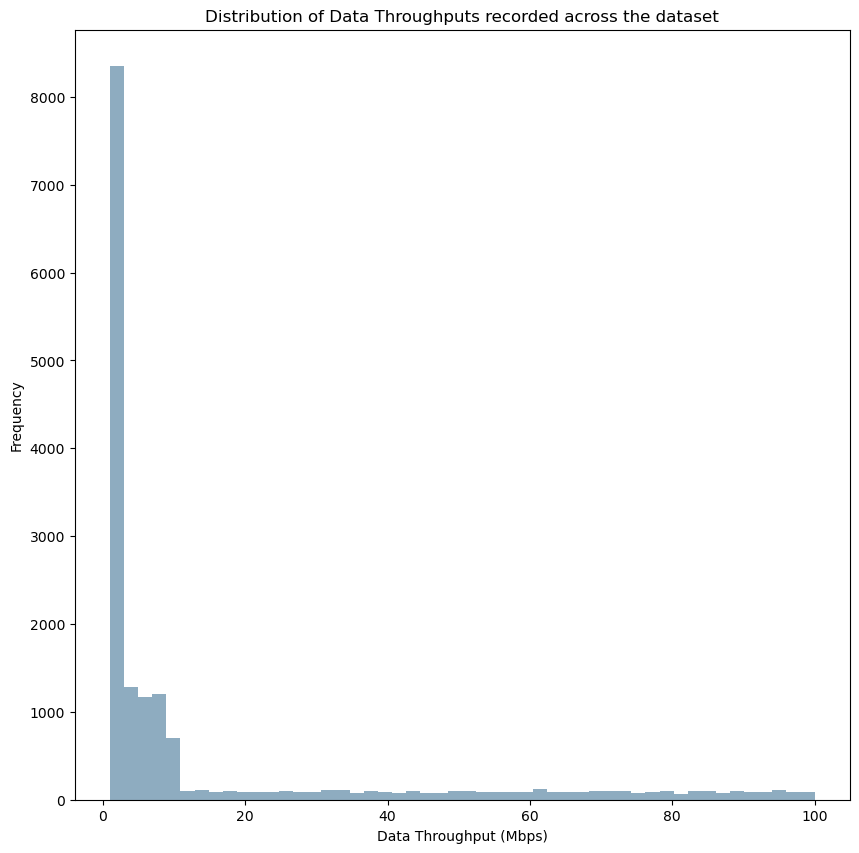

In [17]:
plt.figure(figsize=(10,10))
plt.hist(df["Data Throughput (Mbps)"], bins=50, color="#8EACC0")
plt.xlabel("Data Throughput (Mbps)")
plt.ylabel("Frequency")
plt.title("Distribution of Data Throughputs recorded across the dataset")
plt.show()

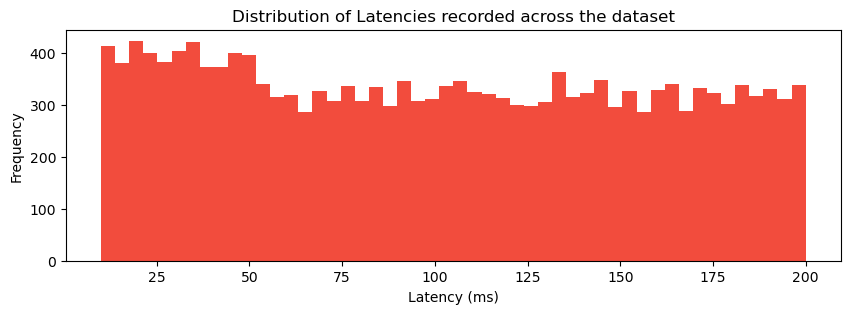

In [18]:
plt.figure(figsize=(10,3))
plt.hist(df["Latency (ms)"], bins=50, color="#F24C3D")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.title("Distribution of Latencies recorded across the dataset")
plt.show()

In [19]:
network_types=df["Network Type"].value_counts()
network_types

Network Type
LTE    4224
4G     4219
3G     4208
5G     4178
Name: count, dtype: int64

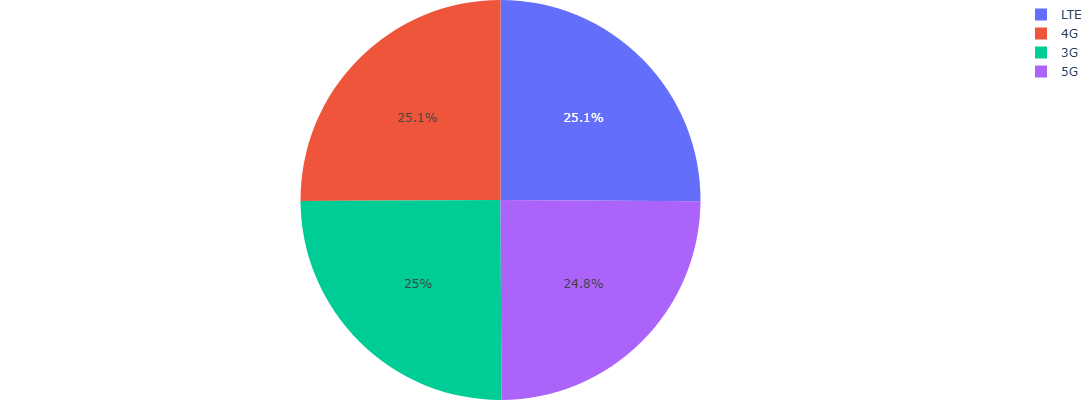

In [25]:
import plotly.express as px

# Create pie chart
fig = px.pie(df, values=network_types.values, names=network_types.index)

# Update layout
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=0, r=0, t=0, b=0),
    plot_bgcolor="#ffffff",
    paper_bgcolor="#ffffff"
)

# Display the figure
fig.show()

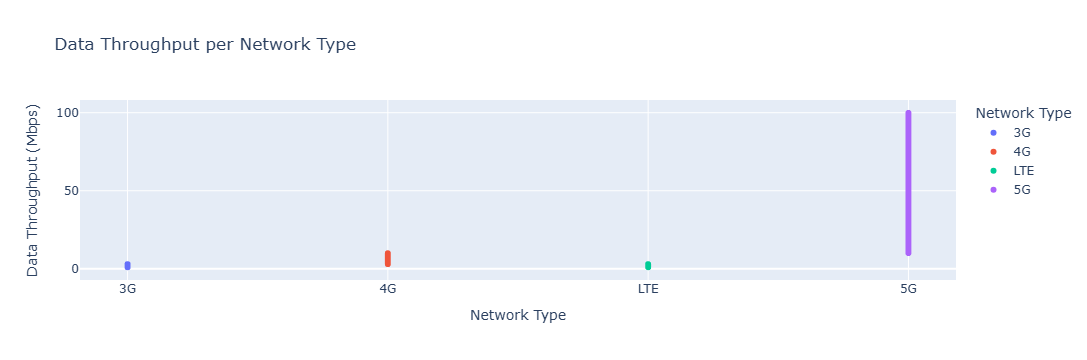

In [26]:

fig = px.scatter(df, x=df["Network Type"], y=df["Data Throughput (Mbps)"], color="Network Type", title="Data Throughput per Network Type")
fig.show()

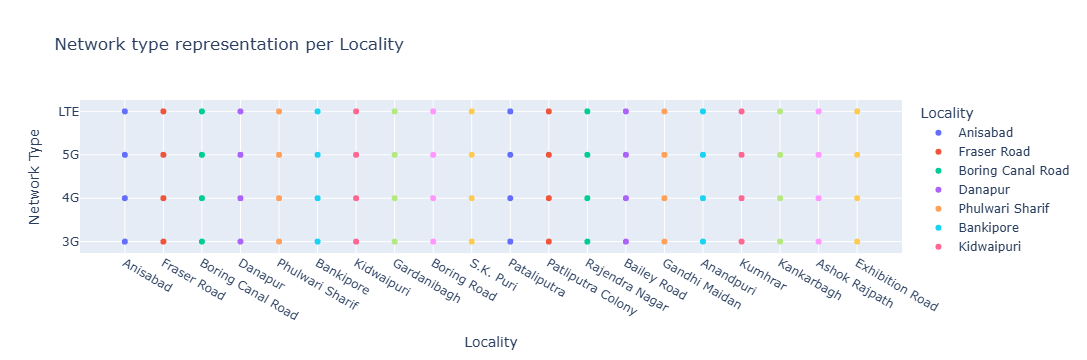

In [27]:
fig = px.scatter(df, x=df["Locality"], y=df["Network Type"], color=df["Locality"], title="Network type representation per Locality")
fig.show()

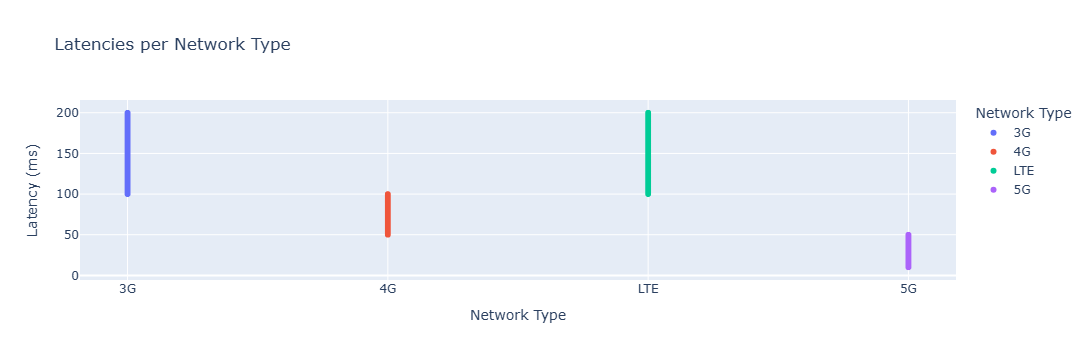

In [28]:
fig = px.scatter(df, x=df["Network Type"], y=df["Latency (ms)"], color="Network Type", title="Latencies per Network Type")
fig.show()

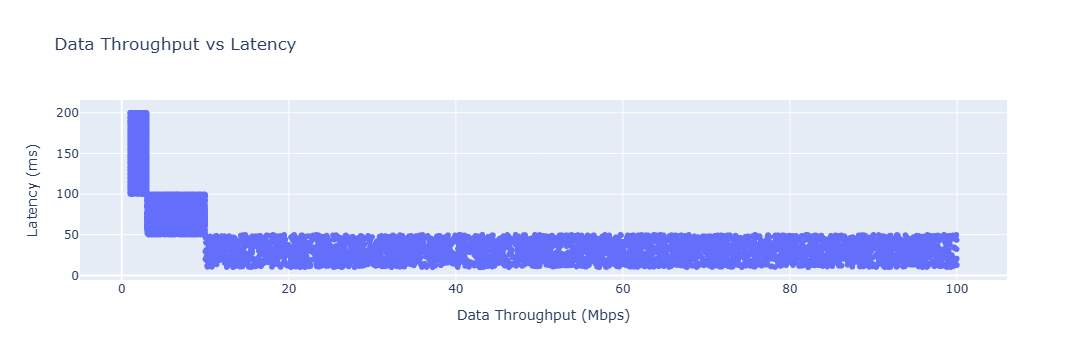

In [24]:
fig = px.scatter(df, x="Data Throughput (Mbps)", y="Latency (ms)", title="Data Throughput vs Latency")
fig.show